In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], dayfirst=True)

# Display the first few rows to understand its structure
print(df.head())
print(df.columns)

        date  Ex_rate
0 1990-01-01   0.7855
1 1990-01-02   0.7818
2 1990-01-03   0.7867
3 1990-01-04   0.7860
4 1990-01-05   0.7849
Index(['date', 'Ex_rate'], dtype='object')


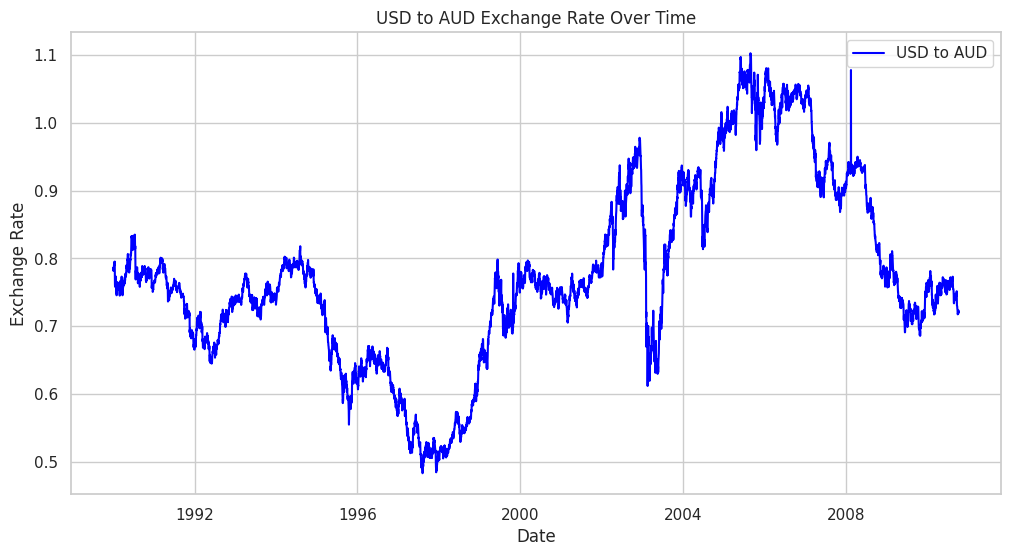

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style='whitegrid')

# Plotting the time series of USD to Australian Dollar exchange rates
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label='USD to AUD', color='blue')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

date       0
Ex_rate    0
dtype: int64


In [ ]:
# Filling missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Alternatively, you can use interpolation
# df['USD_AUD'] = df['USD_AUD'].interpolate()

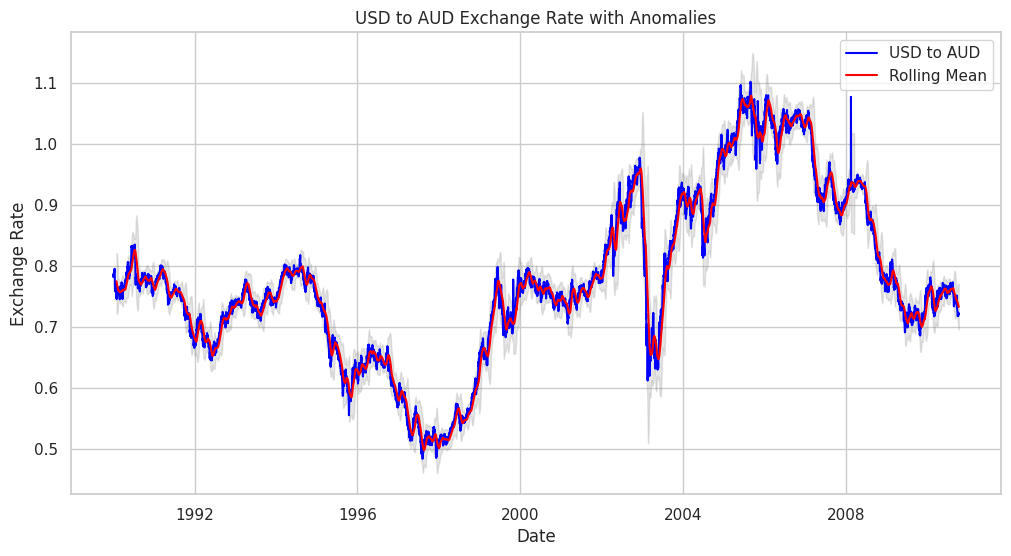

In [ ]:
# Detecting anomalies using rolling statistics
rolling_mean = df['Ex_rate'].rolling(window=30).mean()
rolling_std = df['Ex_rate'].rolling(window=30).std()

# Define a threshold for anomalies
threshold = 3 * rolling_std

# Plotting the anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Ex_rate'], label='USD to AUD', color='blue')
plt.plot(df['date'], rolling_mean, label='Rolling Mean', color='red')
plt.fill_between(df['date'], rolling_mean - threshold, rolling_mean + threshold, color='gray', alpha=0.2)
plt.title('USD to AUD Exchange Rate with Anomalies')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

** Model Building - ARIMA**


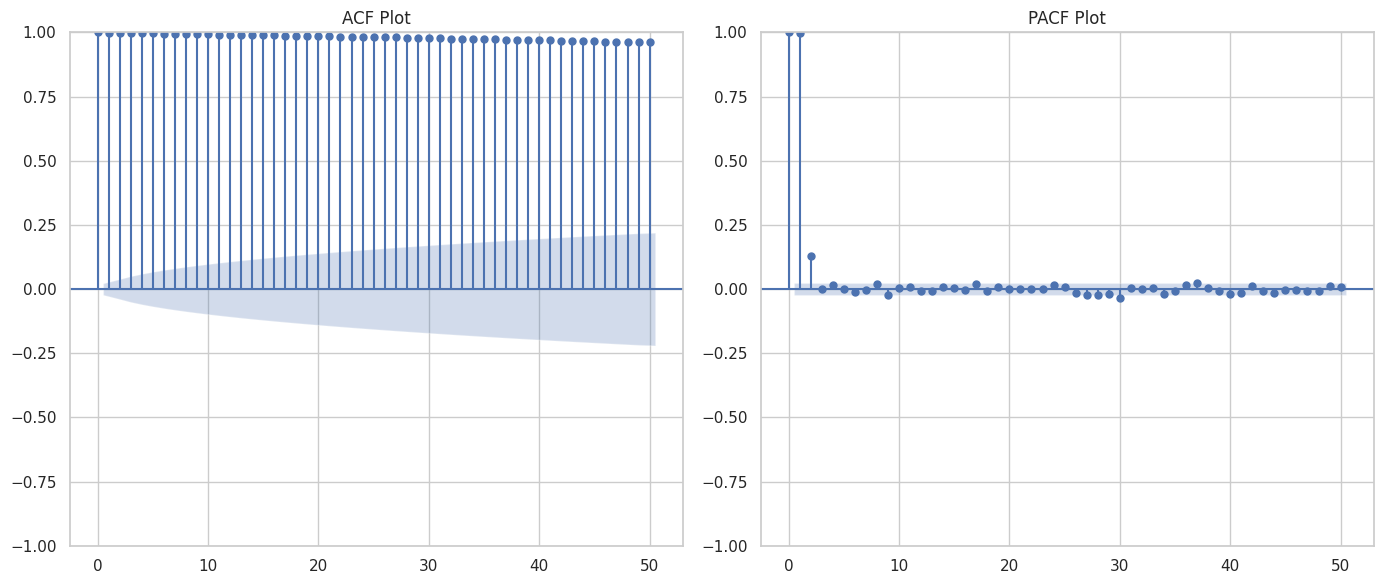

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df is your DataFrame and 'USD_AUD' is the column of interest
data = df['Ex_rate']

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(data, lags=50, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(data, lags=50, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test to check for stationarity
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value is above 0.05, the series is non-stationary and differencing is needed
# Perform differencing if necessary
data_diff = data.diff().dropna()

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


data = df['Ex_rate'].dropna()  # Drop NaNs

# Ensure the data is stationary
result = adfuller(data)
if result[1] > 0.05:
    data = data.diff().dropna()

# Fit the ARIMA model
p, d, q = 1, 1, 1  # Example parameters, adjust based on ACF and PACF
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28041.553
Date:                Mon, 29 Jul 2024   AIC                         -56077.105
Time:                        08:18:53   BIC                         -56056.303
Sample:                             0   HQIC                        -56069.966
                               - 7587                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1325      0.002    -60.326      0.000      -0.137      -0.128
ma.L1         -0.9998      0.021    -48.711      0.000      -1.040      -0.960
sigma2      3.586e-05   7.09e-07     50.608      0.0

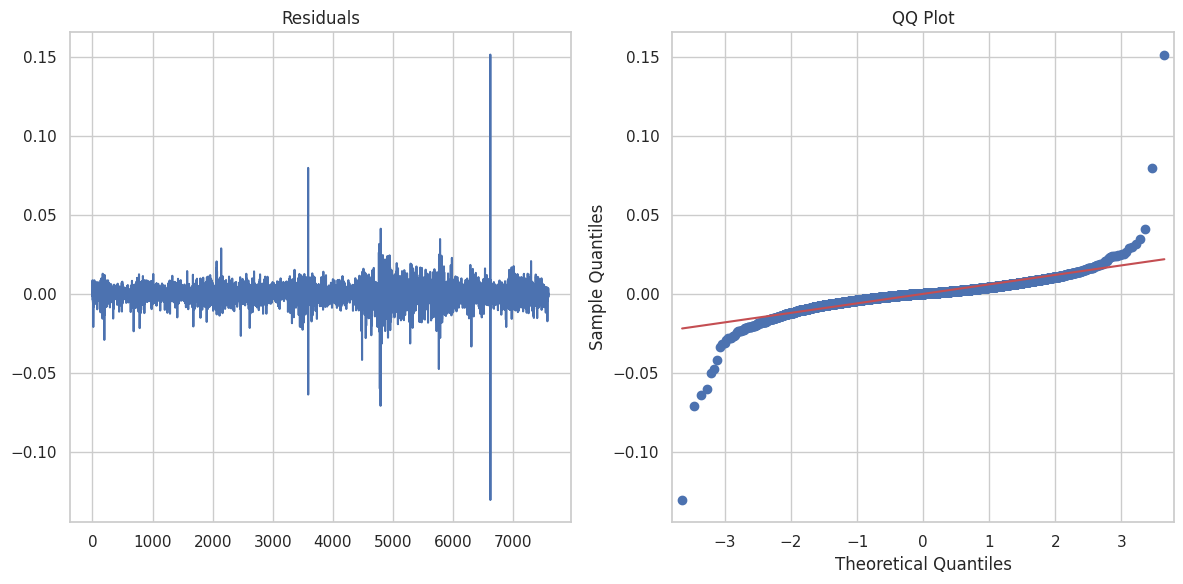

      lb_stat  lb_pvalue
10  11.695339   0.305964


In [ ]:
# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

# Perform Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

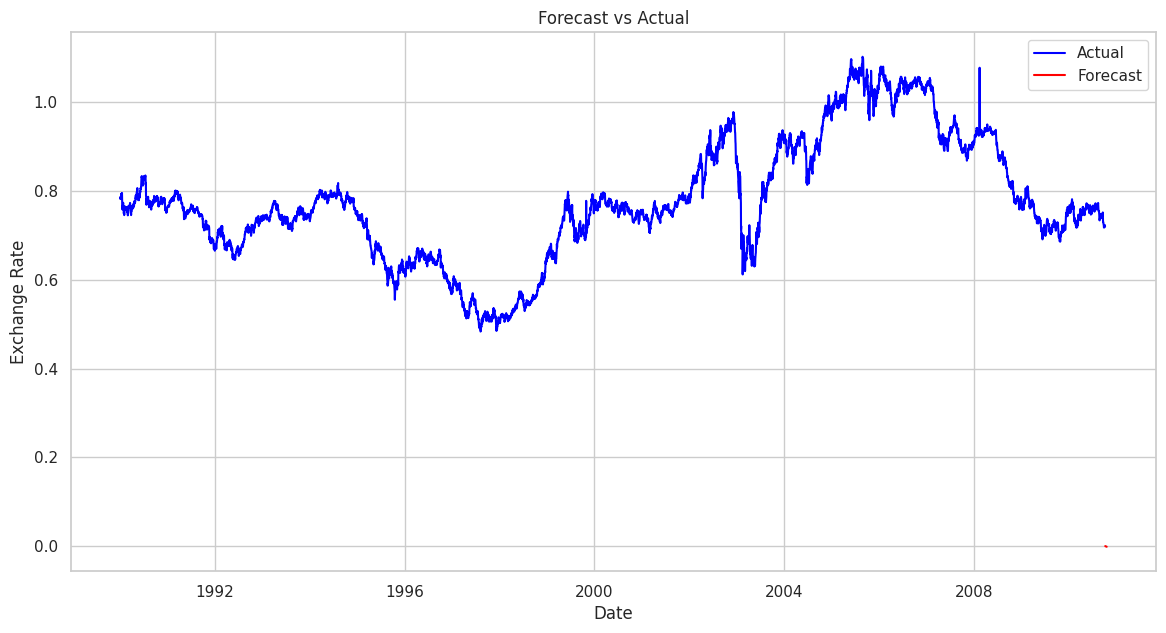

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess data

data = df['Ex_rate'].dropna()

# Ensure data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
if result[1] > 0.05:
    data = data.diff().dropna()

# Fit the ARIMA model
p, d, q = 1, 1, 1  # Example parameters, adjust based on ACF and PACF
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Define forecast steps
forecast_steps = 12
if forecast_steps <= 0:
    raise ValueError("Forecast steps should be a positive integer.")

# Perform forecasting
try:
    forecast_diff = model_fit.forecast(steps=forecast_steps)
    # Integrate the forecasted values if data was differenced
    forecast = pd.Series(forecast_diff).cumsum() + data.iloc[-1]

    # Generate forecast dates
    last_date = df['date'].max()
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

    # Create a DataFrame for plotting
    forecast_df = pd.DataFrame({'date': forecast_dates, 'Forecast': forecast})

    # Adjust the actual data for plotting
    actual_data_for_plot = df[['date', 'Ex_rate']].copy()

    # Plot actual data and forecasts
    plt.figure(figsize=(14, 7))
    plt.plot(actual_data_for_plot['date'], actual_data_for_plot['Ex_rate'], label='Actual', color='blue')
    plt.plot(forecast_df['date'], forecast_df['Forecast'], label='Forecast', color='red')
    plt.title('Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

**Model Building - Exponential Smoothing**

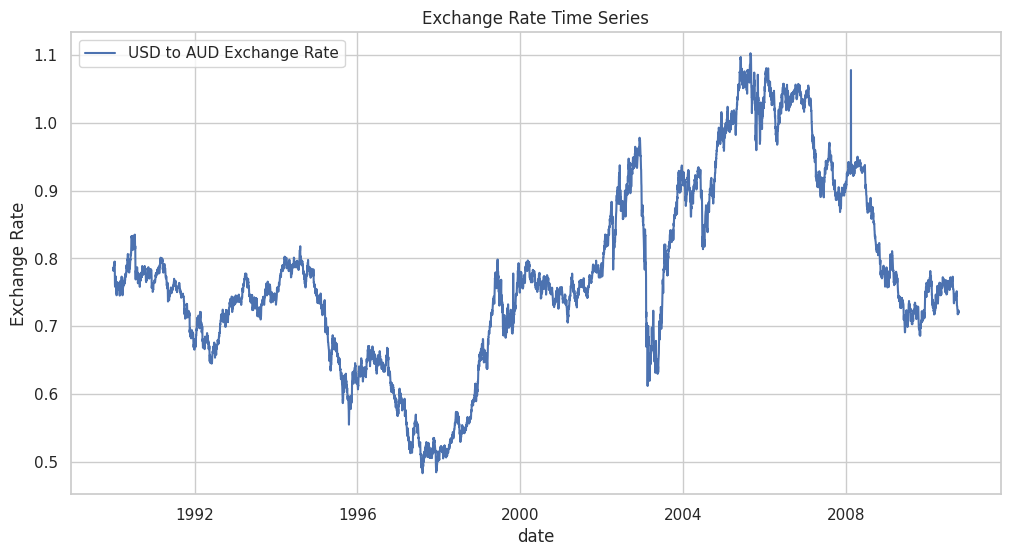

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

data = df['Ex_rate'].dropna()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], data, label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Best Parameters: {'smoothing_level': 0.1, 'smoothing_trend': 0.1, 'smoothing_seasonal': 0.1}


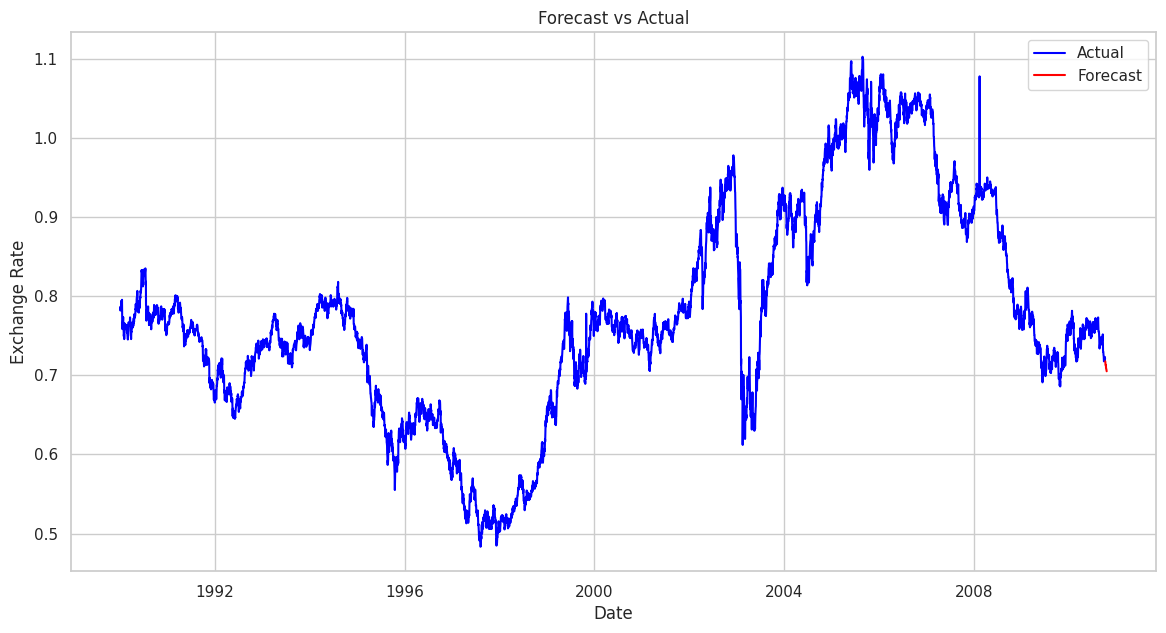

In [ ]:
# using MAE
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load and preprocess data

data = df['Ex_rate'].dropna()

# Define a function to compute model performance
def evaluate_model(model, data, forecast_steps):
    # Split data into training and test sets
    train = data[:-forecast_steps]
    test = data[-forecast_steps:]

    # Fit the model on the training data
    fitted_model = model.fit()

    # Forecast the future
    forecast = fitted_model.forecast(steps=forecast_steps)

    # Compute performance metrics
    mse = mean_squared_error(test, forecast)
    mae = mean_absolute_error(test, forecast)

    return mse, mae, fitted_model

# Define a function to optimize the model
def optimize_model(data, seasonal_periods=None):
    best_mse = float('inf')
    best_model = None
    best_params = {}

    # Test different models and parameters
    if seasonal_periods is None:
        for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
            model = ExponentialSmoothing(data, trend=None, seasonal=None)
            mse, mae, fitted_model = evaluate_model(model, data, forecast_steps=12)
            if mse < best_mse:
                best_mse = mse
                best_model = fitted_model
                best_params = {'smoothing_level': alpha}
    else:
        for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
            for beta in [0.1, 0.3, 0.5, 0.7, 0.9]:
                for gamma in [0.1, 0.3, 0.5, 0.7, 0.9]:
                    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=seasonal_periods)
                    mse, mae, fitted_model = evaluate_model(model, data, forecast_steps=12)
                    if mse < best_mse:
                        best_mse = mse
                        best_model = fitted_model
                        best_params = {'smoothing_level': alpha, 'smoothing_trend': beta, 'smoothing_seasonal': gamma}

    return best_model, best_params

# Example for seasonal data
seasonal_periods = 12  # Adjust based on your data's seasonality
forecast_steps = 12
best_model, best_params = optimize_model(data, seasonal_periods)
print("Best Parameters:", best_params)

# Fit the model with the best parameters
if seasonal_periods is None:
    model = ExponentialSmoothing(data, trend=None, seasonal=None).fit(smoothing_level=best_params['smoothing_level'])
else:
    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit(
        smoothing_level=best_params['smoothing_level'],
        smoothing_trend=best_params['smoothing_trend'],
        smoothing_seasonal=best_params['smoothing_seasonal']
    )

# Forecasting
forecast = model.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast results
forecast_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'Forecast': forecast})

# Plot actual data and forecasts
plt.figure(figsize=(14, 7))
plt.plot(df['date'], data, label='Actual', color='blue')
plt.plot(forecast_df['date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

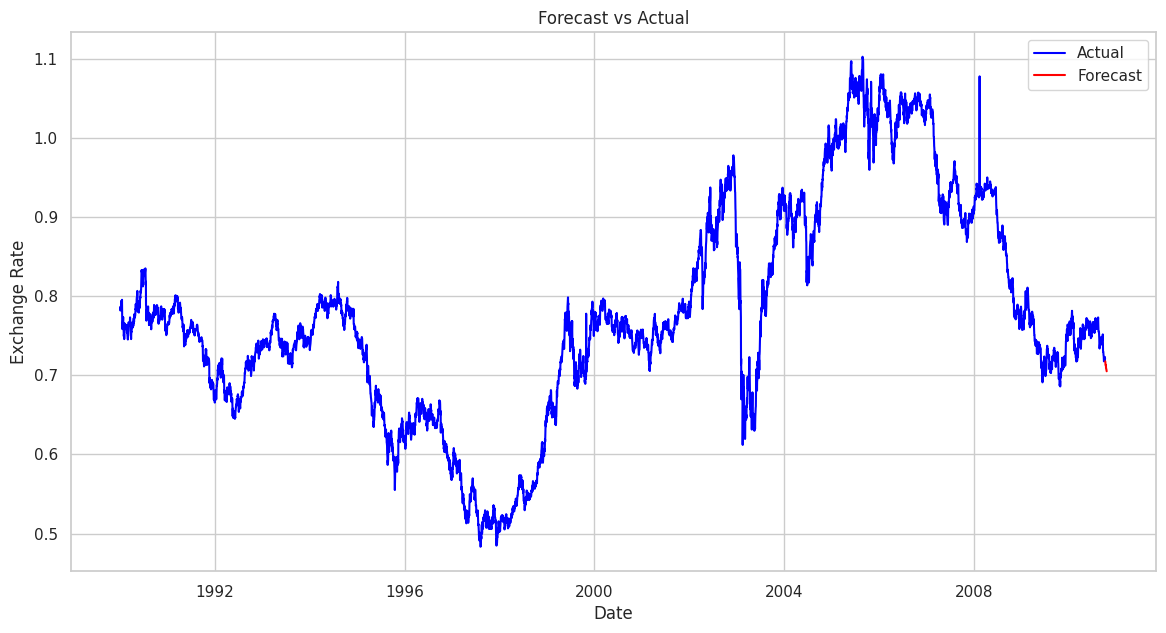

In [ ]:
# Fit the model with the best parameters
if seasonal_periods is None:
    model = ExponentialSmoothing(data, trend=None, seasonal=None).fit(smoothing_level=best_params['smoothing_level'])
else:
    model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit(
        smoothing_level=best_params['smoothing_level'],
        smoothing_trend=best_params['smoothing_trend'],
        smoothing_seasonal=best_params['smoothing_seasonal']
    )

# Forecasting
forecast_steps = 12  # Number of periods to forecast
forecast = model.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast results
forecast_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame({'date': forecast_dates, 'Forecast': forecast})

# Plot actual data and forecasts
plt.figure(figsize=(14, 7))
plt.plot(df['date'], data, label='Actual', color='blue')
plt.plot(forecast_df['date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Evaluation and Comparison

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA Model Error Metrics:
MAE: 0.1778
RMSE: 0.2055
MAPE: 22.81%

Exponential Smoothing Model Error Metrics:
MAE: 0.2068
RMSE: 0.2393
MAPE: 26.53%


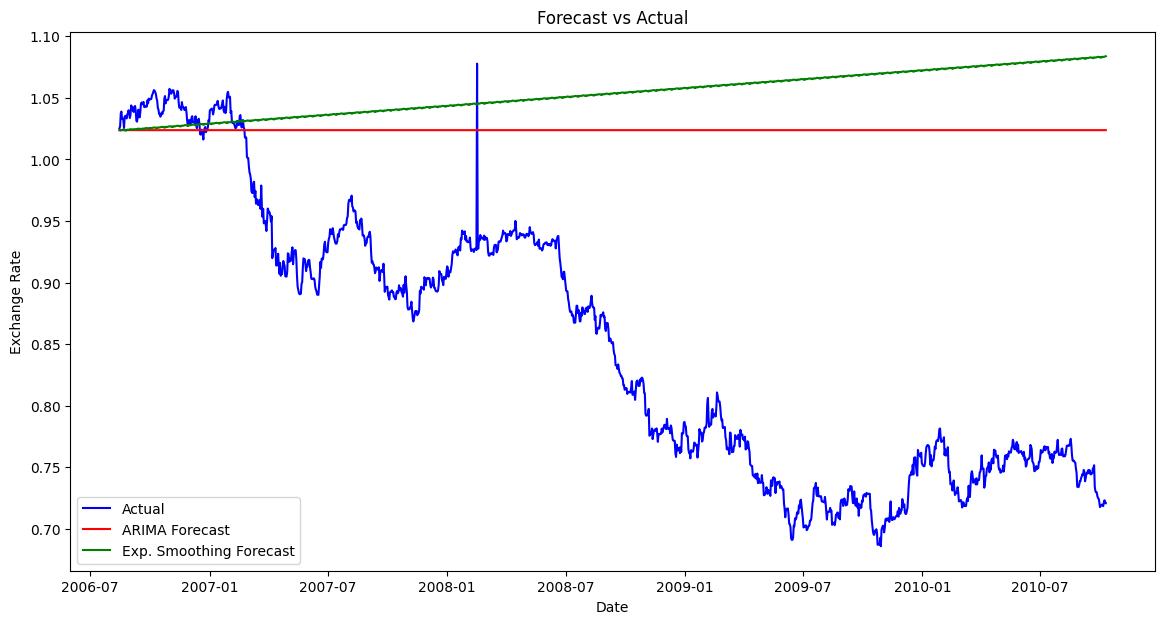

In [ ]:
# Error Metrics
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/content/exchange_rate.csv', parse_dates=['date'], dayfirst=True)
data = df.set_index('date')['Ex_rate']

# Split data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model
arima_model = ARIMA(train, order=(5,1,0))  # Example order; adjust as needed
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

# Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_fit = exp_smoothing_model.fit()
exp_smoothing_forecast = exp_smoothing_fit.forecast(steps=len(test))

# Compute error metrics
def compute_error_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mae, rmse, mape

arima_mae, arima_rmse, arima_mape = compute_error_metrics(test, arima_forecast)
exp_smoothing_mae, exp_smoothing_rmse, exp_smoothing_mape = compute_error_metrics(test, exp_smoothing_forecast)

# Print error metrics
print("ARIMA Model Error Metrics:")
print(f"MAE: {arima_mae:.4f}")
print(f"RMSE: {arima_rmse:.4f}")
print(f"MAPE: {arima_mape:.2f}%")

print("\nExponential Smoothing Model Error Metrics:")
print(f"MAE: {exp_smoothing_mae:.4f}")
print(f"RMSE: {exp_smoothing_rmse:.4f}")
print(f"MAPE: {exp_smoothing_mape:.2f}%")

# Plot actual vs forecasted values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, exp_smoothing_forecast, label='Exp. Smoothing Forecast', color='green')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


Model Comparison
**ARIMA Model**:

Advantages:

Handles Complex Patterns: ARIMA models can handle more complex patterns, including trends and seasonality when extended to SARIMA (Seasonal ARIMA).
Flexibility: The model is highly flexible and can be adjusted to different characteristics of the time series data.
Limitations:

Requires Stationarity: ARIMA models require the time series data to be stationary. This often involves differencing and can be a limitation if the data has complex seasonal patterns.
Model Complexity: Tuning ARIMA models can be complex, especially with multiple parameters (p, d, q) and potential seasonal components.

Exponential Smoothing Models:

Advantages:

Simplicity: Exponential Smoothing models are relatively simple to implement and interpret.
Adaptability: They adapt quickly to changes in the time series data and can effectively handle short-term forecasts.
Limitations:

Limited Complexity Handling: Basic Exponential Smoothing does not handle trends or seasonality. Holt's and Holt-Winters models can handle these, but they may not capture complex patterns as effectively as ARIMA.
Parameter Sensitivity: The performance of Exponential Smoothing models can be sensitive to parameter settings, and choosing the right parameters can be less straightforward.

**Conclusion**

Based on the computed error metrics (MAE, RMSE, MAPE), we can draw the following conclusions:

Compare Error Metrics: If one model has lower MAE, RMSE, and MAPE compared to the other, it indicates better performance in forecasting.

Summary:

ARIMA Model: Suitable for time series with complex patterns and trends. It may perform better when dealing with stationary data and longer historical data but requires careful parameter tuning and handling of stationarity.
Exponential Smoothing Model: Ideal for simpler time series with trends and seasonality. It is easier to implement and adapt to changes but may not handle complex patterns as well as ARIMA.
Insights:

In our current dataset, We can see above the **ARIMA mode**l yields significantly lower error metrics than Exponential Smoothing model error metrics, therefore we can use it for forecasting exchange rates in our dataset.